In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('titanic.csv')

In [3]:
df.head()

,Cabin,Ticket,number,Survived
0,NaN,A/5 21171,5,0
1,C85,PC 17599,3,1
2,NaN,STON/O2. 3101282,6,1
3,C123,113803,3,1
4,NaN,373450,A,0


In [5]:
df['number'].unique()

array(['5', '3', '6', 'A', '2', '1', '4'], dtype=object)

In [4]:
df['number'].nunique()

7

In [7]:
fig = df['number'].value_counts()
fig

number
A    139
6    131
1    129
2    126
4    126
5    123
3    117
Name: count, dtype: int64

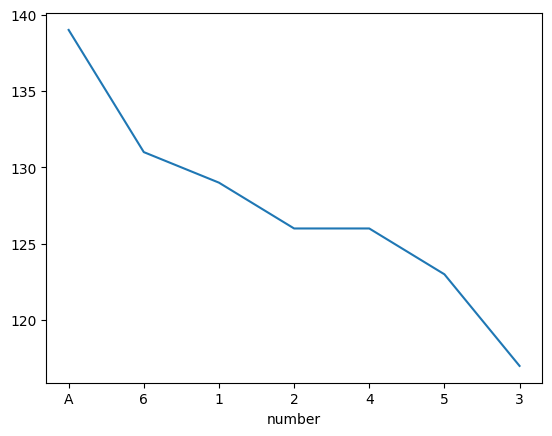

In [8]:
fig = df['number'].value_counts().plot()

Text(0.5, 1.0, 'Passenger travelling with')

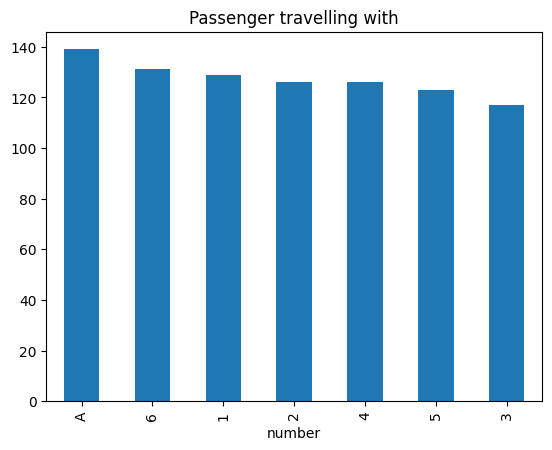

In [10]:
fig = df['number'].value_counts().plot.bar()
fig.set_title('Passenger travelling with')

In [11]:
# extract numberical part
df['number_numerical'] = pd.to_numeric(df['number'],errors='coerce',downcast='integer')

In [12]:
# extract categorical part
df['number_categorical'] = np.where(df['number_numerical'].isnull(),df['number'],np.nan)

In [13]:
df.head()

,Cabin,Ticket,number,Survived,number_numerical,number_categorical
0,NaN,A/5 21171,5,0,5.0,NaN
1,C85,PC 17599,3,1,3.0,NaN
2,NaN,STON/O2. 3101282,6,1,6.0,NaN
3,C123,113803,3,1,3.0,NaN
4,NaN,373450,A,0,NaN,A


In [14]:
df['Cabin'].nunique()

147

In [15]:
df['Ticket'].nunique()

681

In [16]:
df['cabin_num'] = df['Cabin'].str.extract('(\d+)') # capture numberical part
df['cabin_cat'] = df['Cabin'].str[0] # capture the first letter

In [17]:
df.head()

,Cabin,Ticket,number,Survived,number_numerical,number_categorical,cabin_num,cabin_cat
0,NaN,A/5 21171,5,0,5.0,NaN,NaN,NaN
1,C85,PC 17599,3,1,3.0,NaN,85,C
2,NaN,STON/O2. 3101282,6,1,6.0,NaN,NaN,NaN
3,C123,113803,3,1,3.0,NaN,123,C
4,NaN,373450,A,0,NaN,A,NaN,NaN


<Axes: xlabel='cabin_cat'>

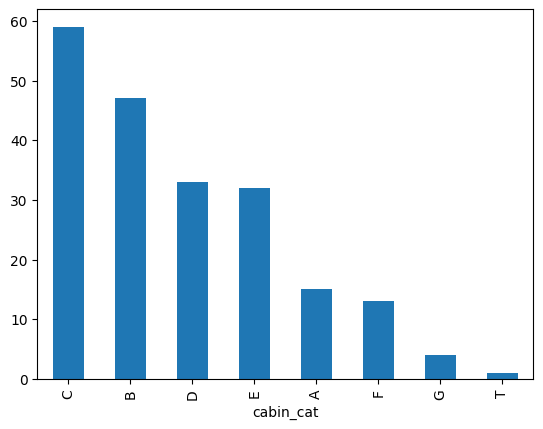

In [18]:
df['cabin_cat'].value_counts().plot(kind='bar')

In [19]:
# extract the last bit of ticket as number
df['ticket_num'] = df['Ticket'].apply(lambda s: s.split()[-1])
df['ticket_num'] = pd.to_numeric(df['ticket_num'],errors='coerce',downcast='integer')

# extract the first part of ticket as category
df['ticket_cat'] =  df['Ticket'].apply(lambda s: s.split()[0])
df['ticket_cat'] = np.where(df['ticket_cat'].str.isdigit(),np.nan,df['ticket_cat'])

In [20]:
df.head()

,Cabin,Ticket,number,Survived,number_numerical,number_categorical,cabin_num,cabin_cat,ticket_num,ticket_cat
0,NaN,A/5 21171,5,0,5.0,NaN,NaN,NaN,21171.0,A/5
1,C85,PC 17599,3,1,3.0,NaN,85,C,17599.0,PC
2,NaN,STON/O2. 3101282,6,1,6.0,NaN,NaN,NaN,3101282.0,STON/O2.
3,C123,113803,3,1,3.0,NaN,123,C,113803.0,NaN
4,NaN,373450,A,0,NaN,A,NaN,NaN,373450.0,NaN


In [21]:
df['ticket_cat'].nunique()

43

In [22]:
df['ticket_cat'].unique()

array(['A/5', 'PC', 'STON/O2.', nan, 'PP', 'A/5.', 'C.A.', 'A./5.',
       'SC/Paris', 'S.C./A.4.', 'A/4.', 'CA', 'S.P.', 'S.O.C.', 'SO/C',
       'W./C.', 'SOTON/OQ', 'W.E.P.', 'STON/O', 'A4.', 'C', 'SOTON/O.Q.',
       'SC/PARIS', 'S.O.P.', 'A.5.', 'Fa', 'CA.', 'LINE', 'F.C.C.', 'W/C',
       'SW/PP', 'SCO/W', 'P/PP', 'SC', 'SC/AH', 'A/S', 'A/4', 'WE/P',
       'S.W./PP', 'S.O./P.P.', 'F.C.', 'SOTON/O2', 'S.C./PARIS',
       'C.A./SOTON'], dtype=object)